<a href="https://colab.research.google.com/github/Ujoshna/OIBSIP/blob/main/oibsip-task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** **Wine Quality Prediction** **

Step 1: Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/WineQT.csv')

# Display the first few rows of the dataset
print(data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

Step 2: Exploratory Data Analysis (EDA)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         

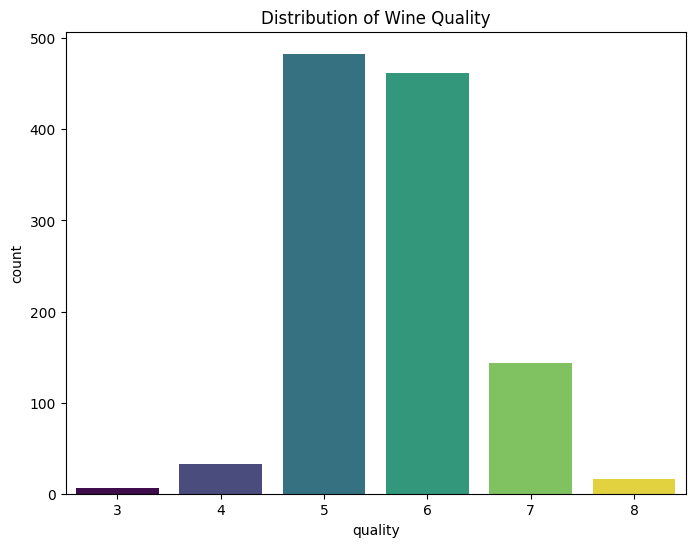

In [8]:
# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Data types and info
print(data.info())

# Visualize the distribution of the wine quality
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data, palette='viridis', hue='quality', dodge=False)
plt.legend([],[], frameon=False)
plt.title('Distribution of Wine Quality')
plt.show()

Step 3: Data Visualization

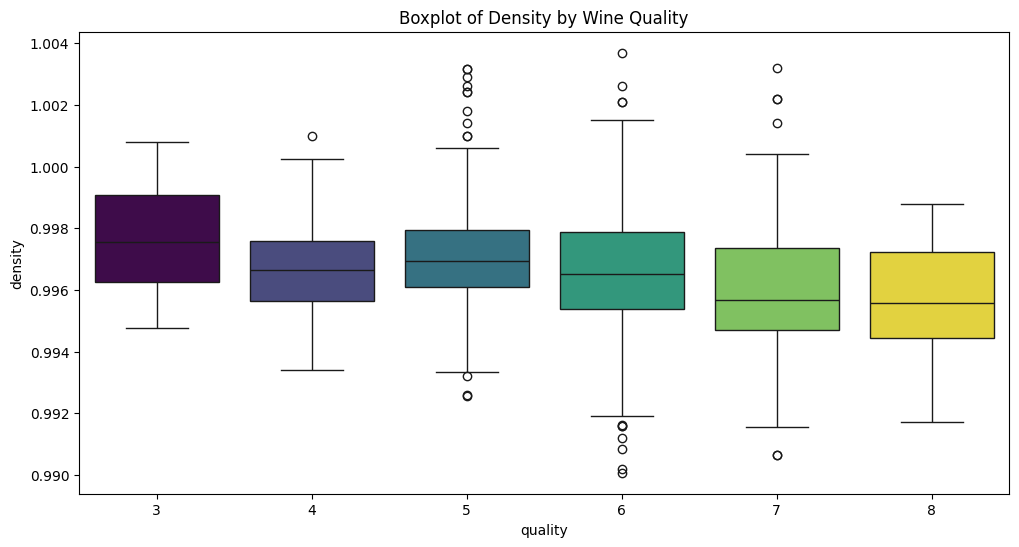

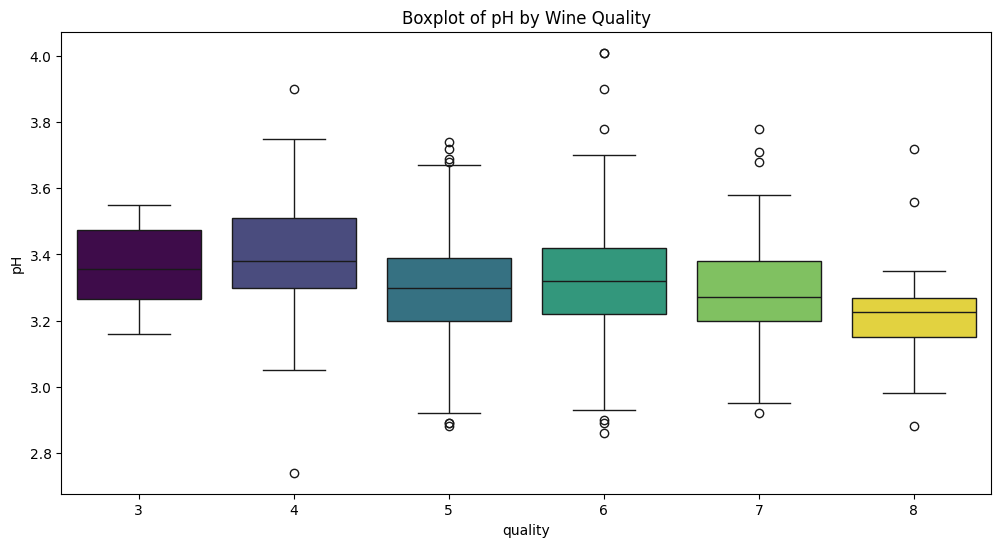

<Figure size 1200x600 with 0 Axes>

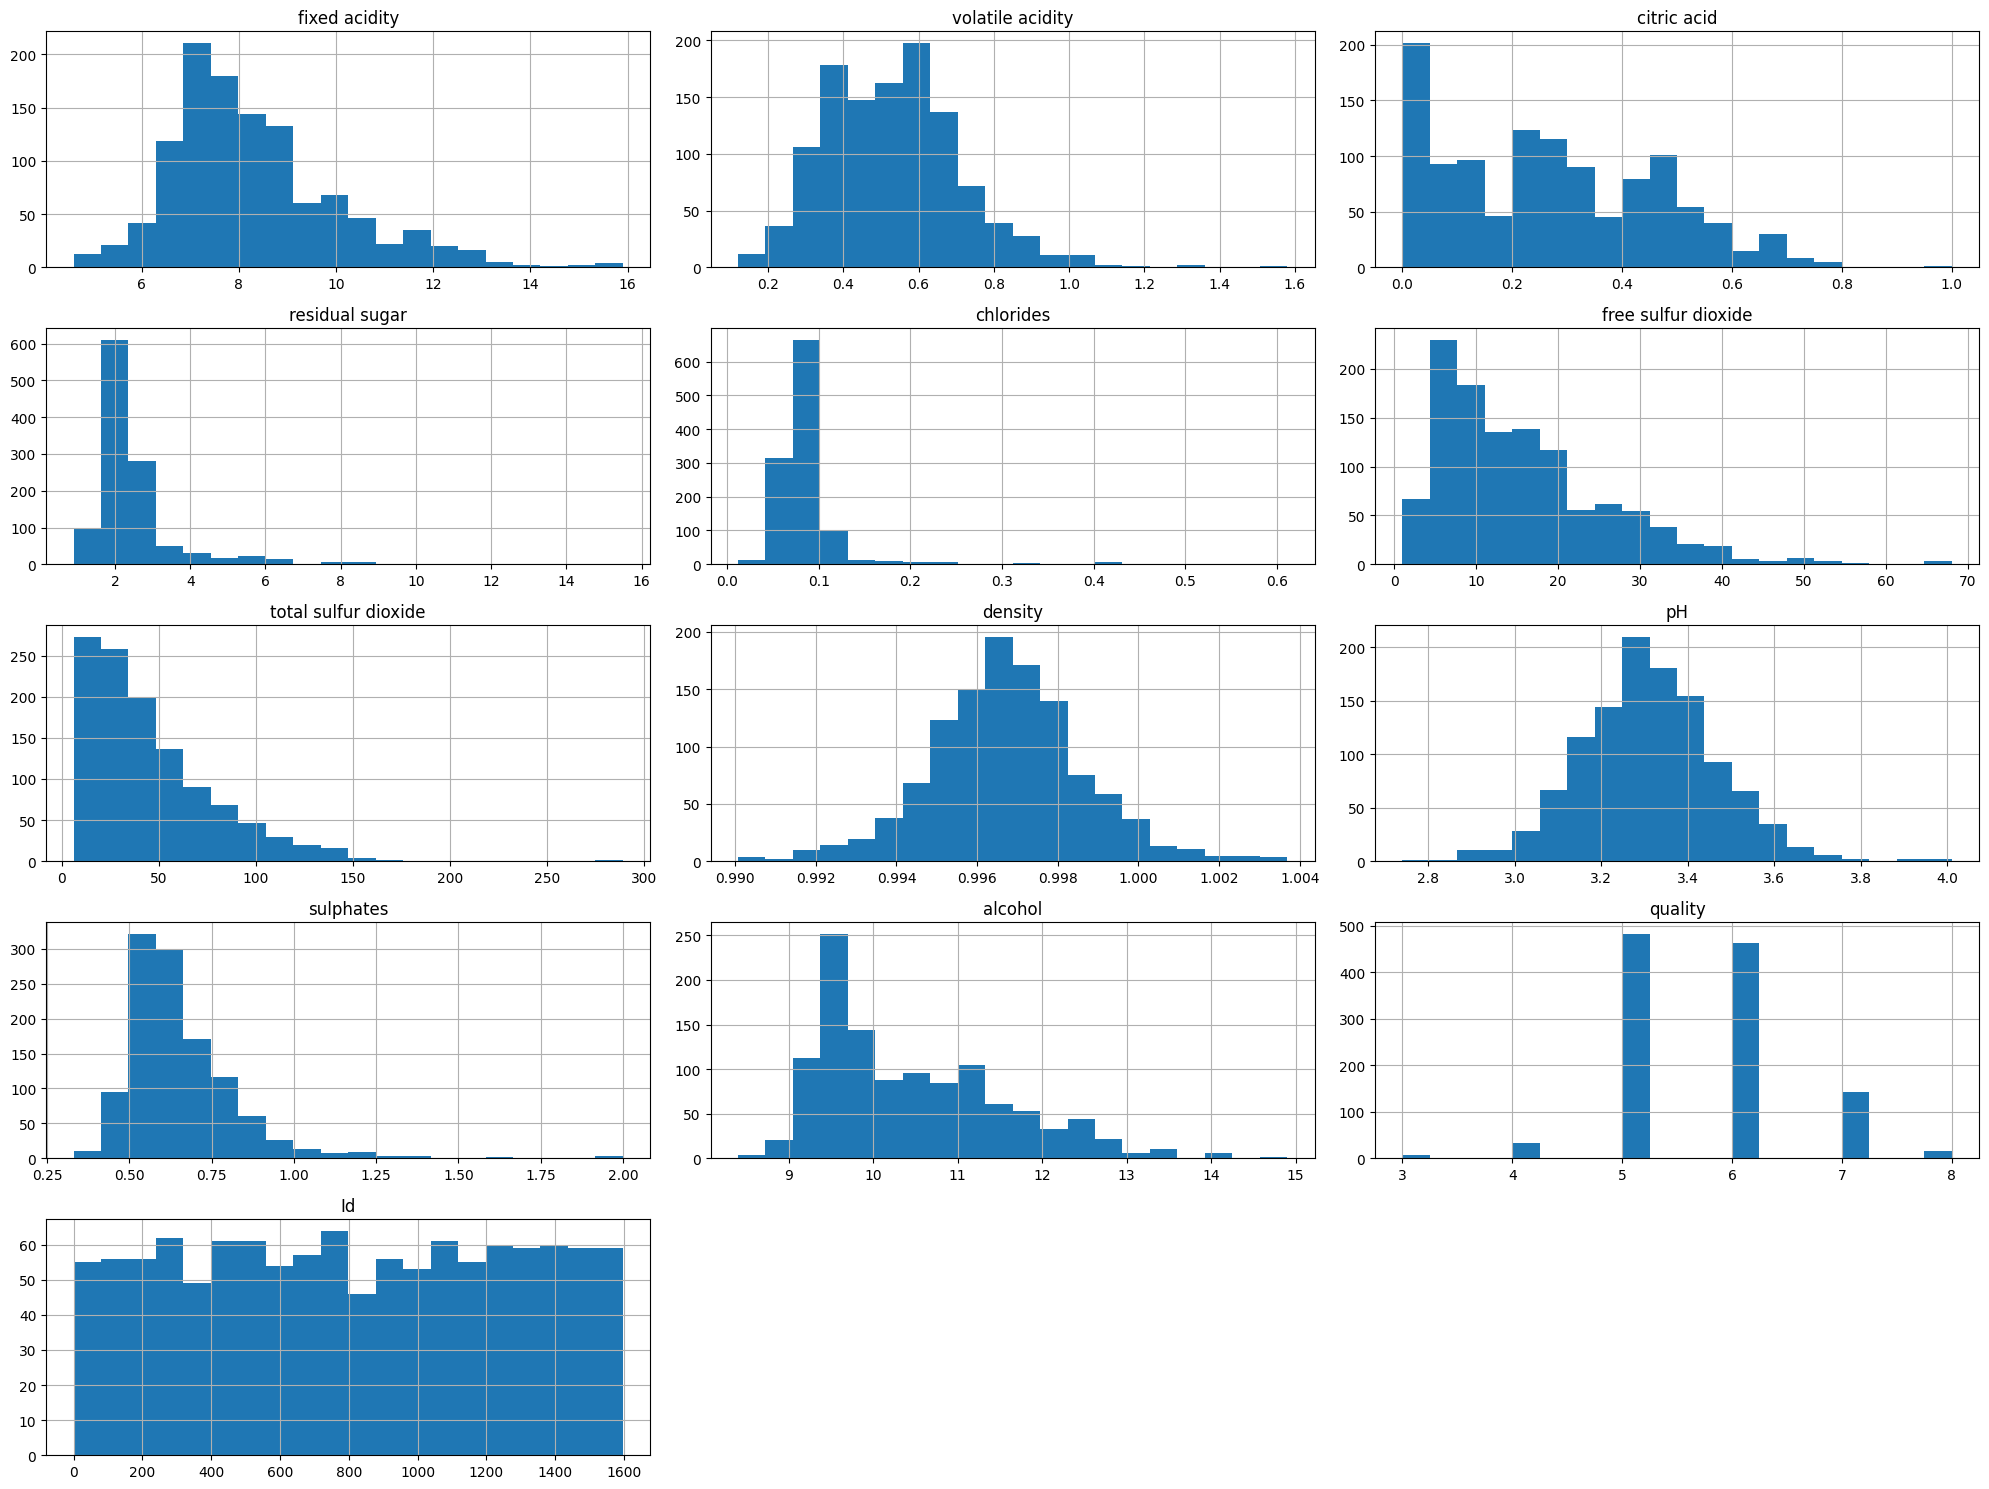

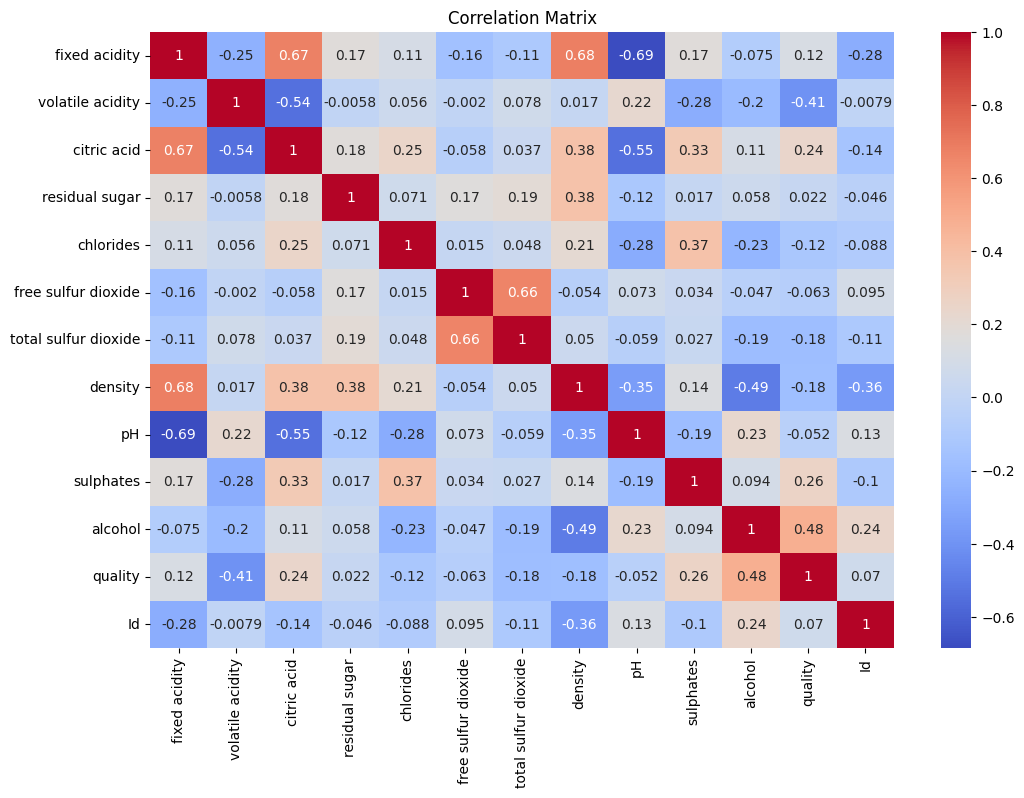

In [9]:
# Box plots for different features grouped by wine quality
plt.figure(figsize=(12, 6))
sns.boxplot(x='quality', y='density', data=data, hue='quality', dodge=False, palette='viridis')
plt.legend([],[], frameon=False)
plt.title('Boxplot of Density by Wine Quality')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='quality', y='pH', data=data, hue='quality', dodge=False, palette='viridis')
plt.legend([],[], frameon=False)
plt.title('Boxplot of pH by Wine Quality')
plt.show()

# Histograms for different features
plt.figure(figsize=(12, 6))
data.hist(bins=20, figsize=(20, 15), layout=(5, 3))
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Step 4: Data Preprocessing

In [4]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(914, 12) (229, 12)


Step 5: Model Training and Evaluation

Random Forest Classifier:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.63      0.70      0.66        99
           7       0.75      0.58      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.42      0.40      0.41       229
weighted avg       0.66      0.68      0.67       229

Accuracy: 0.6812227074235808

Stochastic Gradient Descent Classifier:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.74      0.33      0.46        96
           6       0.48      0.91      0.63        99
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00         2

    accuracy                           0.53       229
   macro avg       0.25      0.25  

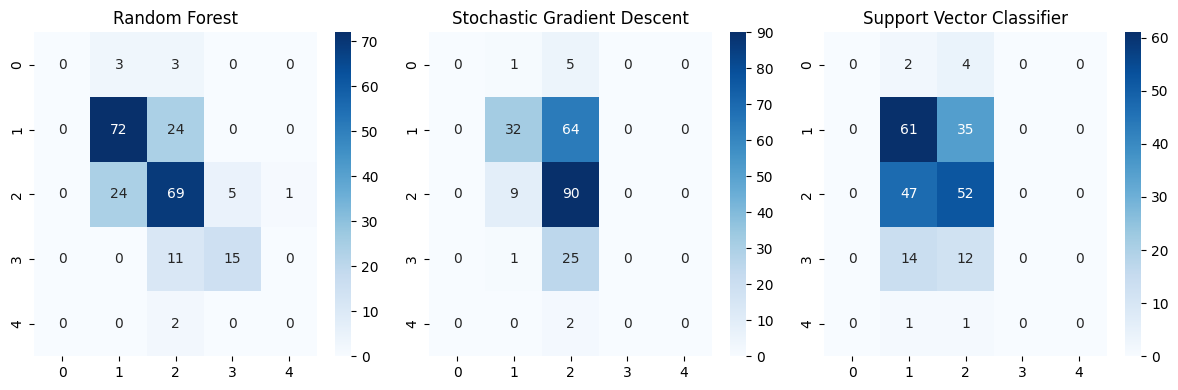

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
sgd_model = SGDClassifier(random_state=42)
svc_model = SVC(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
sgd_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

# Make predictions
rf_preds = rf_model.predict(X_test)
sgd_preds = sgd_model.predict(X_test)
svc_preds = svc_model.predict(X_test)
import warnings
warnings.filterwarnings('ignore')

# Evaluate the models
print("Random Forest Classifier:")
print(classification_report(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))

print("\nStochastic Gradient Descent Classifier:")
print(classification_report(y_test, sgd_preds))
print("Accuracy:", accuracy_score(y_test, sgd_preds))

print("\nSupport Vector Classifier:")
print(classification_report(y_test, svc_preds))
print("Accuracy:", accuracy_score(y_test, svc_preds))

# Confusion matrices
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest')

plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix(y_test, sgd_preds), annot=True, fmt='d', cmap='Blues')
plt.title('Stochastic Gradient Descent')

plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(y_test, svc_preds), annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Classifier')

plt.tight_layout()
plt.show()
